## Details 

El fichero data.csv contiene los datos necesarios para crear vuestros modelos, y está compuesto por las siguientes columnas:

- price: in US dollars [TARGET]
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y)
- table: width of top of diamond relative to widest point

El fichero **predict.csv** contiene las mismas columnas, com excepción de la columna price, que será tu tarea predecir. El fichero sample_submission.csv contiene un ejemplo del formato en que debe estar tu submission.

Atención! Los index en el submission deben ser los mismos de `predict.csv`, y todos los elementos deben estar presentes. Además del index, el submission debe contener la columna `price` con las predicciones.


## Tools

Puedes, y debes, probar diferentes modelos, parámetros y preparación de los datos. La documentación de sklearn será tú mejor amiga:

- [Pre Processing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
- [Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)
- [Model Selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

nota: La métrica utilizada en esa competición será el RMSE.

Referencias: 

- [IGS - Measurements](https://www.gemsociety.org/article/diamond-measurements/)
- [The Diamond Pro - Clarity](https://www.diamonds.pro/education/clarity/)
- [The Diamond Pro - Proportions](https://www.diamonds.pro/guides/diamond-proportion/)
- [Loose Diamond - Cuts](https://www.loosediamondsreviews.com/diamondcut.html)
- [Beyond - Colors](https://beyond4cs.com/color/)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
data = pd.read_csv("data/data.csv", index_col=0)
data_predict = pd.read_csv("data/predict.csv", index_col=0)
from sklearn.model_selection import KFold

In [40]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
0,1.01,Ideal,G,VVS2,60.6,57.0,6.54,6.50,3.95,7167
1,0.31,Good,F,SI1,63.5,56.0,4.30,4.33,2.74,516
2,1.02,Premium,D,SI2,59.5,62.0,6.56,6.52,3.89,4912
3,0.27,Ideal,E,VVS2,62.0,55.0,4.12,4.14,2.56,622
4,0.70,Very Good,F,VS2,61.7,63.0,5.64,5.61,3.47,2762
...,...,...,...,...,...,...,...,...,...,...
37753,1.51,Very Good,E,VS2,63.2,56.0,7.28,7.22,4.58,13757
37754,0.41,Premium,J,VS1,62.0,55.0,4.77,4.74,2.95,830
37755,0.32,Very Good,E,VVS2,61.6,54.0,4.43,4.46,2.74,816


<AxesSubplot:>

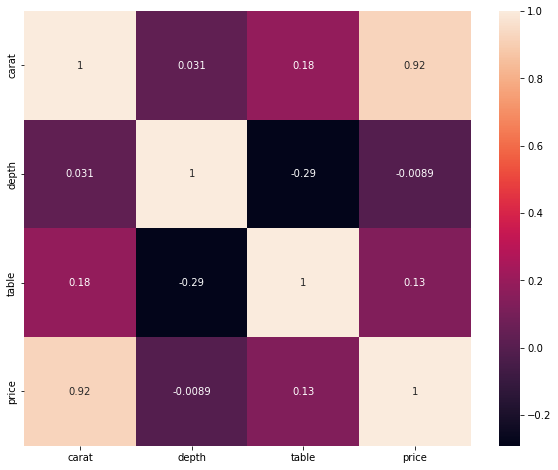

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(data.drop(columns = ['x', 'y', 'z']).corr(), annot=True)

In [160]:
data.loc[(data['x'] == 0) & (data['y'] == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
47,1.20,Premium,D,VVS1,62.1,59.0,0.0,0.0,0.0,15686
1839,2.25,Premium,H,SI2,62.8,59.0,0.0,0.0,0.0,18034
1872,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
2353,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381
17917,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
24489,1.00,Very Good,H,VS2,63.3,53.0,0.0,0.0,0.0,5139


In [161]:
data[(data['x'] == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
47,1.20,Premium,D,VVS1,62.1,59.0,0.0,0.00,0.0,15686
1839,2.25,Premium,H,SI2,62.8,59.0,0.0,0.00,0.0,18034
1872,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,2130
2353,1.14,Fair,G,VS1,57.5,67.0,0.0,0.00,0.0,6381
17917,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,2130
24489,1.00,Very Good,H,VS2,63.3,53.0,0.0,0.00,0.0,5139
36330,1.07,Ideal,F,SI2,61.6,56.0,0.0,6.62,0.0,4954


In [162]:
data[(data['y'] == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
47,1.20,Premium,D,VVS1,62.1,59.0,0.0,0.0,0.0,15686
1839,2.25,Premium,H,SI2,62.8,59.0,0.0,0.0,0.0,18034
1872,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
2353,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381
17917,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
24489,1.00,Very Good,H,VS2,63.3,53.0,0.0,0.0,0.0,5139


In [163]:
rows_x = data[(data['x'] == 0)].index
rows_y = data[(data['y'] == 0)].index

In [164]:
rows_x 

Int64Index([47, 1839, 1872, 2353, 17917, 24489, 36330], dtype='int64', name='index')

In [165]:
data = data.drop(index =rows_x,axis=0)

# not equals

In [166]:
data[data['y'] > 11]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
17000,2.00,Premium,H,SI2,58.9,57.0,8.09,58.9,8.06,12210
31002,0.51,Ideal,E,VS1,61.8,55.0,5.15,31.8,5.12,2075


In [167]:
data[data['z'] > 10]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
7427,0.51,Very Good,E,VS1,61.8,54.7,5.12,5.15,31.8,1970


In [168]:
rows_d = data[(data['y'] > 11) | (data['z'] > 10)].index

In [169]:
rows_d

Int64Index([7427, 17000, 31002], dtype='int64', name='index')

In [170]:
data = data.drop(index =rows_d,axis=0)

In [171]:
data = data.reset_index()

In [172]:
data = data.drop(columns = ['index'])

In [173]:
data[45:50]

,carat,cut,color,clarity,depth,table,x,y,z,price
45,0.30,Premium,F,VS2,60.7,58.0,4.32,4.35,2.63,605
46,0.26,Premium,F,VS1,59.5,58.0,4.18,4.22,2.50,452
47,0.96,Ideal,G,SI1,63.0,54.0,6.27,6.24,3.94,4355
48,0.50,Ideal,D,VVS2,61.0,56.0,5.11,5.15,3.13,2272
49,0.41,Premium,G,VS2,61.9,59.0,4.77,4.73,2.94,1061


In [176]:
#data['ratio'] = data['x']/data['y']

In [178]:
#data['ratio'].max()

In [179]:
#data['ratio'].min()

In [180]:
#data[data['ratio'] <= 0.15]

In [181]:
data['MM'] = round(data['x']*data['y'], 2)

In [182]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price,MM
0,1.01,Ideal,G,VVS2,60.6,57.0,6.54,6.50,3.95,7167,42.51
1,0.31,Good,F,SI1,63.5,56.0,4.30,4.33,2.74,516,18.62
2,1.02,Premium,D,SI2,59.5,62.0,6.56,6.52,3.89,4912,42.77
3,0.27,Ideal,E,VVS2,62.0,55.0,4.12,4.14,2.56,622,17.06
4,0.70,Very Good,F,VS2,61.7,63.0,5.64,5.61,3.47,2762,31.64
...,...,...,...,...,...,...,...,...,...,...,...
37743,1.51,Very Good,E,VS2,63.2,56.0,7.28,7.22,4.58,13757,52.56
37744,0.41,Premium,J,VS1,62.0,55.0,4.77,4.74,2.95,830,22.61
37745,0.32,Very Good,E,VVS2,61.6,54.0,4.43,4.46,2.74,816,19.76
37746,0.38,Good,G,VS2,58.8,62.0,4.68,4.71,2.76,771,22.04


In [183]:
data[data['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price,MM
1694,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265,70.48
11970,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0,3142,42.44
12657,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0,4731,50.34
13999,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383,44.76
20139,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167,43.96
21768,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631,71.74
23414,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696,42.06
26418,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,5564,46.99
27645,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,3837,42.06


In [184]:
def fill_z(row):
    #print(row['z'])
    if row['z'] == 0:
        return  (row['depth']/100)*(row['x'] + row['y'])/2
    else:
        return row['z']

In [185]:
data['z'] =  data.apply(fill_z, axis=1)

In [186]:
data[data['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price,MM


In [187]:
data.iloc[1694]

carat          2.2
cut        Premium
color            H
clarity        SI1
depth         61.2
table         59.0
x             8.42
y             8.37
z          5.13774
price        17265
MM           70.48
Name: 1694, dtype: object

In [20]:
# depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y)
# 

# depth*(x + y)/2 = z 

In [41]:
y = data['price']
X = data.drop(columns=['price', 'x', 'y', 'z'])

In [42]:
X_dummies = pd.get_dummies(X, columns=["cut", "color", "clarity"], prefix="", prefix_sep="" )

In [43]:
X_dummies.head()

,carat,depth,table,Fair,Good,Ideal,Premium,Very Good,D,E,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
index,,,,,,,,,,,,,,,,,,,,,
0,1.01,60.6,57.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.31,63.5,56.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.02,59.5,62.0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.27,62.0,55.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.70,61.7,63.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


from sklearn.model_selection import KFold
knfolds = KFold(n_splits=5)
data_gen = knfolds.split(X_dummies,y)



cross_validation = {}

for name, model in models.items():
    kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []
    for train_id, test_id in  kfolds.split(X_dummies, y):
        model.fit(X_dummies.iloc[train_id], y.iloc[train_id])
        results.append({
            "train": mse(y.iloc[train_id], model.predict(X_dummies.iloc[train_id]))**.5,
            "test":  mse(y.iloc[test_id], model.predict(X_dummies.iloc[test_id]))**.5
        })
    cross_validation[name] = results

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=42)

In [7]:
X_train

,carat,depth,table,Fair,Good,Ideal,Premium,Very Good,D,E,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
index,,,,,,,,,,,,,,,,,,,,,
25885,1.12,60.6,59.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1804,1.55,61.0,61.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1844,0.99,68.1,56.0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
27396,0.80,60.1,57.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24691,0.30,60.4,58.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0.45,59.6,61.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6265,0.50,63.0,55.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
11284,0.40,63.8,59.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
rf = RandomForestRegressor()

In [10]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
rf.predict(X_test)

array([  683.45133333,  1787.318     ,  1756.46033333, ...,
         561.36892857, 17578.22      ,   923.453     ])

In [12]:
# RMSE
rmse_train = mse(y_train, rf.predict(X_train))**.5
rmse_test = mse(y_test, rf.predict(X_test))**.5

In [13]:
pd.DataFrame({
    "error_train":[rmse_train],
    "error_test":[rmse_test]
})

,error_train,error_test
0,212.91591,577.379354


In [22]:
y_pred_train = rf.predict(X_test)

In [23]:
maxi = max([y_pred_train.max(), y_test.max()])
mini = min([y_pred_train.min(), y_test.min()])

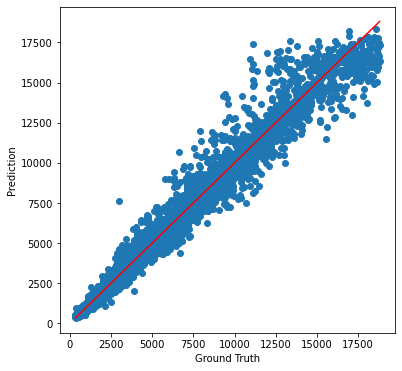

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_train)
plt.plot([mini,maxi],[mini,maxi], color="red")
plt.xlabel("Ground Truth")
plt.ylabel("Prediction");

models = {
    "LinearRegression":LinearRegression(),
    #"Poly_2":Pipeline([("poly_features",PolynomialFeatures(degree=2)),
    #                   ("linear_regression", LinearRegression())]),
    #"Poly_3":Pipeline([("poly_features",PolynomialFeatures(degree=3)),
    #                   ("linear_regression", LinearRegression())]),
    #"Poly_4":Pipeline([("poly_features",PolynomialFeatures(degree=4)),
    #                   ("linear_regression", LinearRegression())]),
    "Lasso":Lasso(alpha=1),
    "Ridge":Ridge(alpha=1),
    #"Support Vector Machine":SVR(),
    #"SGD":SGDRegressor(),
    "Random Forrest": RandomForestRegressor(),
    "Polynomial_dg_2_Lasso":Pipeline([('poly', PolynomialFeatures(degree=3)),
                                      ("lasso",Lasso(alpha=1))]),
}

cross_validation = {}

for name, model in models.items():
    kfolds = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []
    for train_id, test_id in  kfolds.split(X_dummies, y):
        model.fit(X_dummies.iloc[train_id], y.iloc[train_id])
        results.append({
            "train": mse(y.iloc[train_id], model.predict(X_dummies.iloc[train_id]))**.5,
            "test":  mse(y.iloc[test_id], model.predict(X_dummies.iloc[test_id]))**.5
        })
    print(name)
    cross_validation[name] = results

cross_validation

In [191]:
def get_means(lst):
    keys = set([k for ks in lst for k in ks.keys()])
    means = {}
    for k in keys:
        values = [dic[k] for dic in lst]
        means[k] = sum(values)/len(values)
    return means
#get_means(cross_validation["LinearRegression"])

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame({k:get_means(v) for k,v in cross_validation.items()}).T

results_train = {}
results_test = {}

for name,model in models.items():
    model.fit(X_train, y_train)
    results_train[name] = mse(y_train, model.predict(X_train))**.5
    results_test[name] = mse(y_test, model.predict(X_test))**.5
    print(name)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame({
    "Train":results_train,
    "Test":results_test
})

# Choosing Random Forrest

In [44]:
rf = RandomForestRegressor()

In [51]:
kfolds = KFold(n_splits=4, shuffle=True, random_state=42)
results = []
for train_id, test_id in  kfolds.split(X_dummies, y):
    
    rf.fit(X_dummies.iloc[train_id], y.iloc[train_id])
    results.append({
        "train": mse(y.iloc[train_id], rf.predict(X_dummies.iloc[train_id]))**.5,
        "test":  mse(y.iloc[test_id], rf.predict(X_dummies.iloc[test_id]))**.5
    })
    print(1)


1
1
1
1


In [52]:
results

[{'train': 212.4845142712389, 'test': 576.8925678052786},
 {'train': 212.18608833149642, 'test': 569.9839676969038},
 {'train': 216.44811611395593, 'test': 562.5537731768969},
 {'train': 217.6313657095211, 'test': 552.5155671840402}]

In [53]:
data_predict 

,carat,cut,color,clarity,depth,table,x,y,z
index,,,,,,,,,
0,1.57,Premium,F,SI1,60.4,59.0,7.57,7.54,4.56
1,1.56,Ideal,G,SI1,61.2,56.0,7.51,7.49,4.59
2,0.70,Premium,E,VS1,58.4,59.0,5.91,5.83,3.43
3,0.90,Fair,G,SI1,65.4,57.0,6.04,5.95,3.92
4,1.22,Ideal,H,VS2,61.4,57.0,6.89,6.85,4.22
...,...,...,...,...,...,...,...,...,...
16177,0.46,Ideal,J,VVS1,61.8,56.0,4.97,4.93,3.06
16178,2.03,Premium,I,SI1,59.8,59.0,8.29,8.24,4.94
16179,0.30,Premium,D,SI1,62.2,61.0,4.28,4.24,2.65


In [39]:
#rows_x = data_predict[(data_predict ['y'] == 0)].index

In [40]:
#rows_x

In [41]:
data_predict[10553:10556]

,carat,cut,color,clarity,depth,table,x,y,z
index,,,,,,,,,
10553,0.59,Very Good,E,VS2,59.4,63.0,5.42,5.46,3.23
10554,1.56,Ideal,G,VS2,62.2,54.0,0.00,0.00,0.00
10555,1.24,Ideal,E,VS2,62.9,56.0,6.84,6.79,4.29


In [42]:
#data_predict = data_predict.drop(index =rows_x,axis=0)

In [43]:
#data_predict = data_predict.reset_index()

In [44]:
#data_predict = data_predict.drop(columns = ['index'])

In [45]:
#data_predict['ratio'] = data_predict['x']/data_predict['y']

In [195]:
data_predict['MM'] = round(data_predict['x']*data_predict['y'], 2)

In [196]:
data_predict[data_predict['MM'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,MM
index,,,,,,,,,,
10554,1.56,Ideal,G,VS2,62.2,54.0,0.0,0.0,0.0,0.0


In [197]:
collection = data_predict.loc[(data_predict['carat'] >= 1.54) & (data_predict['carat'] <= 1.56) & (data_predict['cut'] == 'Ideal') & (data_predict['color'] == 'G') & (data_predict['clarity'] == 'VS2')]

In [198]:
collection 

,carat,cut,color,clarity,depth,table,x,y,z,MM
index,,,,,,,,,,
2122,1.55,Ideal,G,VS2,61.6,55.0,7.45,7.48,4.60,55.73
3932,1.56,Ideal,G,VS2,62.3,53.0,7.41,7.49,4.64,55.50
5073,1.54,Ideal,G,VS2,61.2,56.0,7.43,7.47,4.56,55.50
6404,1.54,Ideal,G,VS2,61.4,57.0,7.47,7.42,4.57,55.43
10554,1.56,Ideal,G,VS2,62.2,54.0,0.00,0.00,0.00,0.00
15337,1.56,Ideal,G,VS2,61.3,56.0,7.48,7.50,4.59,56.10


In [199]:
len(collection['MM'])-1

5

In [51]:
collection['x'][:].sum()
 

37.239999999999995

In [52]:
(collection['MM'].sum()/len(collection['MM'])-1)

45.376666666666665

In [200]:
data_predict['MM'] = data_predict['MM'].apply(lambda x: 55.45 if x == 0 else x )

In [201]:
data_predict[data_predict['MM'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,MM
index,,,,,,,,,,


In [55]:
data_predict.iloc[10554]

carat       1.56
cut        Ideal
color          G
clarity      VS2
depth       62.2
table       54.0
x            0.0
y            0.0
z            0.0
MM         55.45
Name: 10554, dtype: object

In [54]:
X_pred = data_predict.drop(columns=['x', 'y', 'z'])

In [55]:
X_dummies_pre = pd.get_dummies(X_pred, columns=["cut", "color", "clarity"], prefix="", prefix_sep="" )

In [56]:
X_dummies_pre

,carat,depth,table,Fair,Good,Ideal,Premium,Very Good,D,E,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
index,,,,,,,,,,,,,,,,,,,,,
0,1.57,60.4,59.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.56,61.2,56.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.70,58.4,59.0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.90,65.4,57.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.22,61.4,57.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16177,0.46,61.8,56.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
16178,2.03,59.8,59.0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
16179,0.30,62.2,61.0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [57]:
price_predictions = rf.predict(X_dummies_pre)

In [58]:
price_predictions = pd.DataFrame({'price':price_predictions}).reset_index()

In [59]:
price_predictions.set_index('index', inplace=True)

In [60]:
price_predictions

,price
index,
0,10955.450
1,11021.403
2,2959.910
3,3300.730
4,6473.920
...,...
16177,1174.170
16178,15584.280
16179,662.277


In [61]:
price_predictions.to_csv('data/my_predict.csv')

In [210]:
price_predictions

,price
index,
0,10820.350000
1,11070.640000
2,3040.180000
3,3342.330000
4,6285.686667
...,...
16177,1013.590000
16178,15523.960000
16179,649.825000


In [67]:
sample_submission = pd.read_csv("data/sample_submission.csv", index_col=0)

In [68]:
sample_submission

,price
index,
0,2155
1,2890
2,6720
3,1626
4,567
...,...
16177,6128
16178,2879
16179,6100
